# Student Habits vs Academic Performance

Dataset: https://www.kaggle.com/datasets/jayaantanaath/student-habits-vs-academic-performance

## Introduction

This analysis explores the relationships between students' lifestyle habits—such as screen time, study hours, sleep, exercise, and mental health—and their academic performance. Using a dataset of self-reported behaviours and exam scores, the goal is to identify patterns that might explain why some students perform better than others.

By investigating both individual and combined effects of different habits on exam outcomes, the report aims to uncover insights that could inform personal study strategies, student wellbeing initiatives, or broader educational interventions.

----

## 1. Data Import & Overview

Before conducting any analysis, we load and inspect the dataset to understand its structure and content.

#### Import Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Load Dataset

In [2]:
df = pd.read_csv("student_habits_performance.csv")

#### Preview Dataset

In [3]:
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


#### Summary Statistics

In [4]:
df.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


- The average exam score is approximately 69.6 with a standard deviation of 16.9.
- Students study an average of 3.6 hours per day, spend about 2.5 hours on social media, and sleep about 6.5 hours.
- Mental health ratings and other variables also show significant variability, highlighting potential areas of influence on performance.

#### Dataset Shape

In [5]:
print('Shape:', df.shape)   # (rows, columns)

Shape: (1000, 16)


The dataset includes 1,000 students and 16 columns, representing a mix of numerical, categorical, and boolean features. More detailed inspection and data type correction will follow in the next section.

-----

## 2. Data Cleaning 

Before we get started with analysing the data, we will clean the dataset by handling missing values, correct data types, and check for duplicates and outliers.

#### Handling Missing values

In [6]:
df.isnull().sum()

student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64

The parental_education_level column has 91 missing values (9.1%).
Since this feature is not essential to our core analysis, we will drop it to avoid introducing bias through imputation.

In [7]:
df = df.drop(columns=["parental_education_level"])

#### Checking for Duplicates

In [8]:
print(df.duplicated().sum())

0


No duplicate rows were found in the dataset.

#### Reviewing and Fixing Data Types

Let's check the current data types and convert them where appropriate.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  internet_quality               1000 non-null   object 
 12  mental_health_rating           1000 non-null   in

\
The dataset includes:

- **Numerical columns**: age, study hours, screen time, sleep hours, etc.

- **Categorical columns** (object): gender, diet quality, internet quality

- **Yes/No columns**: part-time job, extracurricular participation

Convert categorical features to category type:

In [10]:
categorical_cols = ["gender", "diet_quality","internet_quality"]

for col in categorical_cols:
    df[col] = df[col].astype("category")

Convert Yes/No features to boolean:

In [11]:
df["part_time_job"] = df["part_time_job"].map({"Yes": True, "No": False})
df["extracurricular_participation"] = df["extracurricular_participation"].map({"Yes": True, "No": False})

#### Spotting Outliers in Exam Scores

Let us visualise the distribution of **exam_score** using a histogram and boxplot.

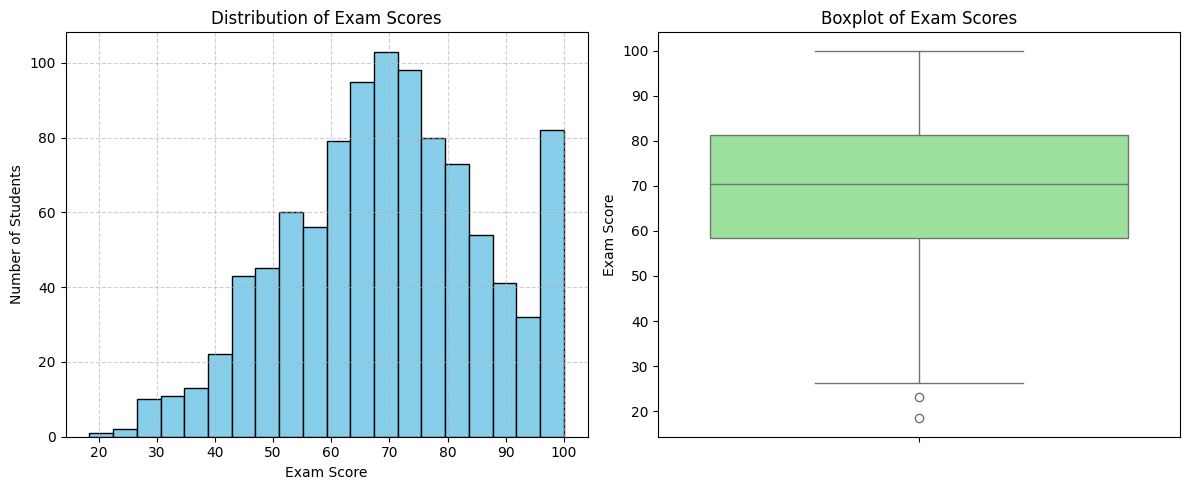

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram 
axes[0].hist(df["exam_score"], bins=20, color="skyblue", edgecolor="black")
axes[0].set_title("Distribution of Exam Scores")
axes[0].set_xlabel("Exam Score")
axes[0].set_ylabel("Number of Students")
axes[0].grid(True, linestyle='--', alpha=0.6)

# Boxplot 
sns.boxplot(y=df["exam_score"], ax=axes[1], color="lightgreen")
axes[1].set_title("Boxplot of Exam Scores")
axes[1].set_ylabel("Exam Score")

plt.tight_layout()
plt.show()

**Observations:**

- **High scorers**: More students than expected scored close to 100%. These are not statistical outliers and will be kept.
- **Low scorers**: A few students fall below the lower whisker and will be reviewed as potential outliers.

Calculate whiskers using IQR:

In [13]:
Q1 = df["exam_score"].quantile(0.25)
Q3 = df["exam_score"].quantile(0.75)
IQR = Q3 - Q1

lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

print(f"Lower whisker limit: {lower_whisker:.2f}")
print(f"Upper whisker limit: {upper_whisker:.2f}")

Lower whisker limit: 24.20
Upper whisker limit: 115.60


Identify and review low outliers:

In [14]:
outliers_df = df[df['exam_score'] < lower_whisker]
outliers_df

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,internet_quality,mental_health_rating,extracurricular_participation,exam_score
265,S1265,18,Female,0.6,3.1,3.0,False,79.9,5.2,Good,1,Good,4,False,18.4
327,S1327,23,Male,0.9,2.4,2.5,False,89.2,6.9,Fair,0,Poor,1,False,23.1


These students scored significantly below the rest and show:

- Very low study hours

- Poor mental health

- High screen time

Remove these two extreme outliers:

In [15]:
df = df[df['exam_score'] >= 24]

#### Post Cleaning Shape Check

In [16]:
df.shape

(998, 15)

----

## 3. Exploratory Data Analysis

This section explores the underlying patterns in the dataset by analysing both numerical and categorical variables. The goal is to identify key factors that may influence exam performance, using correlation analysis and group-wise comparisons.

### 3.1 Numerical Data Relationships 

#### Correlation Analysis

To understand relationships between numerical variables, let us generate a correlation matrix.

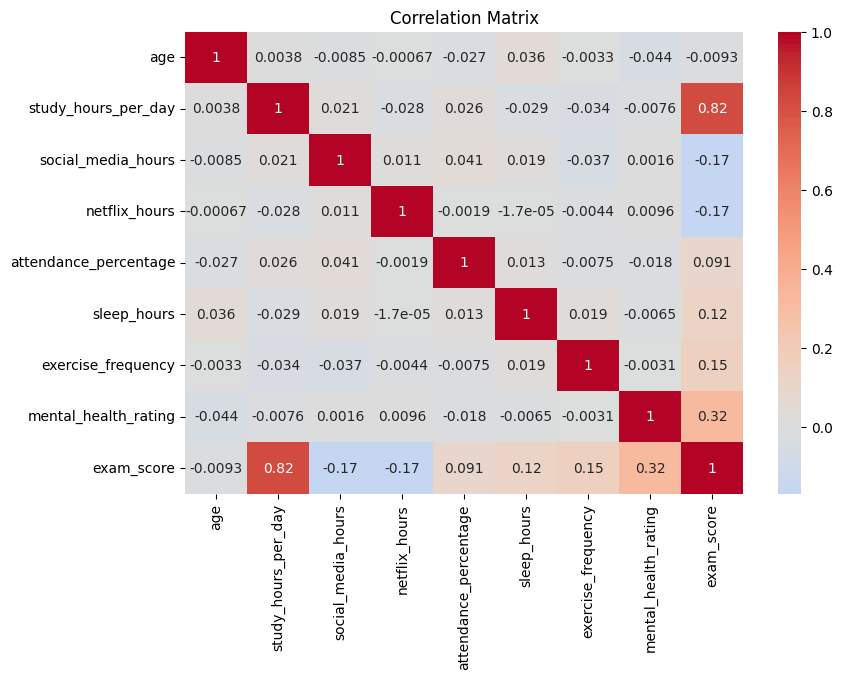

In [17]:
# Only keep numeric columns
numeric_cols = df.select_dtypes(include='number')

# Correlation matrix
corr = numeric_cols.corr()

# Plot
plt.figure(figsize=(9, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix")
plt.show()

**Notable correlations with exam_score:**

- **Study hours per day**: Strong positive correlation (**+0.82**), indicating a clear relationship between more study time and higher exam performance.

- **Mental health rating**: Moderate positive correlation (**+0.32**), suggesting better mental health is associated with higher scores.

- **Social media hours** and **Netflix hours**: Weak negative correlations (around **-0.17**), hinting that higher screen time may slightly reduce performance.

- **Exercise frequency** (**+0.15**) and **sleep hours** (**+0.12**): Weak positive relationships, indicating slight benefits to academic outcomes.

Other variables, including age and attendance, showed weak or negligible correlations with exam scores.

### 3.2 Category-based Analysis

Compare average exam scores accross various categorical and boolean groups:

In [18]:
cat_cols = ["gender", "part_time_job", "diet_quality", "internet_quality", "extracurricular_participation"]

for col in cat_cols:
    print(f"\n---- {col} ----")
    means = df.groupby(col, observed=True)["exam_score"].mean().round(3)
    means.name = None              
    means.index.name = None     
    print(means)


---- gender ----
Female    69.848
Male      69.466
Other     70.648
dtype: float64

---- part_time_job ----
False    69.962
True     68.743
dtype: float64

---- diet_quality ----
Fair    70.537
Good    69.502
Poor    68.128
dtype: float64

---- internet_quality ----
Average    70.644
Good       68.760
Poor       70.007
dtype: float64

---- extracurricular_participation ----
False    69.735
True     69.623
dtype: float64


\
**Key Observations**:

- **Diet quality** shows a consistent pattern—poorer diets are associated with lower scores.

- **Part-time job** holders score slightly lower on average, though the difference is modest.

- **Gender** and **extracurricular participation** have minimal impact on performance.

- **Internet quality** does not follow a clear or expected trend.



----

## 4. Individual Factors and Academic Performance

This section explores key individual factors that influence exam scores: study time, mental health, and screen time.

### 4.1 Study Time 

A strong positive relationship exists between daily study hours and exam performance. Students who dedicate more time to studying tend to achieve higher exam scores.

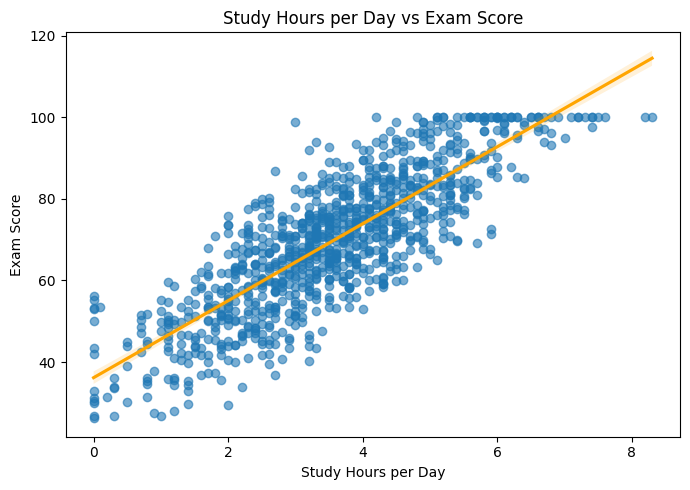

In [19]:
plt.figure(figsize=(7, 5))
sns.regplot(data=df, x='study_hours_per_day', y='exam_score', scatter_kws={'alpha':0.6}, line_kws={'color':'orange'})
plt.title('Study Hours per Day vs Exam Score')
plt.xlabel('Study Hours per Day')
plt.ylabel('Exam Score')
plt.tight_layout()
plt.show()

There is a clear positive linear relationship, reinforcing the importance of consistent study time.

### 4.2 Mental Health 

Mental health rating shows a moderate positive correlation with exam scores (r ≈ 0.32). Students reporting better mental health tend to have higher average exam scores and less variation.

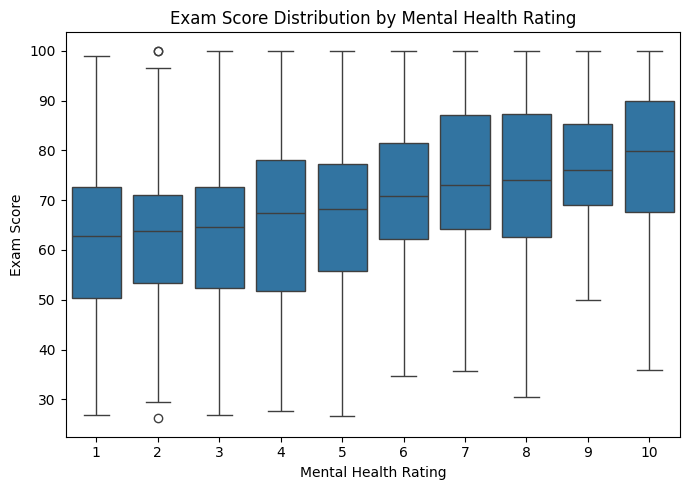

In [20]:
plt.figure(figsize=(7, 5))
sns.boxplot(data=df, x='mental_health_rating', y='exam_score')
plt.title('Exam Score Distribution by Mental Health Rating')
plt.xlabel('Mental Health Rating')
plt.ylabel('Exam Score')
plt.tight_layout()
plt.show()

The boxplot illustrates how exam scores vary across mental health ratings, with higher mental health associated with higher median scores and reduced variability.

### 4.3 Screen Time 

To better understand the impact of screen time on exam performance, we combined daily hours spent on social media and Netflix into a single **total screen time** variable.

In [21]:
# Combine social media and Netflix hours into total screen time
df['total_screen_time'] = df['social_media_hours'] + df['netflix_hours']

# Calculate correlation between total screen time and exam score
corr = df[['total_screen_time', 'exam_score']].corr().iloc[0,1]
print(f"Correlation between total screen time and exam score: {corr:.2f}")

Correlation between total screen time and exam score: -0.24


This combined measure shows a slightly stronger negative correlation with exam scores (r = -0.24) compared to the individual correlations for social media or Netflix usage alone (both approximately r = -0.17). This suggests that overall screen exposure may be more consistently associated with a small decline in academic performance.

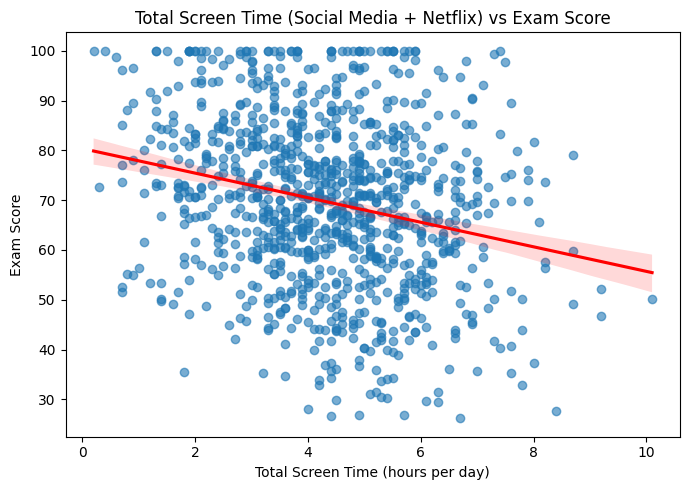

In [22]:
df['total_screen_time'] = df['social_media_hours'] + df['netflix_hours']

plt.figure(figsize=(7, 5))
sns.regplot(data=df, x='total_screen_time', y='exam_score', scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Total Screen Time (Social Media + Netflix) vs Exam Score')
plt.xlabel('Total Screen Time (hours per day)')
plt.ylabel('Exam Score')
plt.tight_layout()
plt.show()

The scatterplot with regression line indicates a mild negative relationship between total daily screen time and exam scores, suggesting that increased screen use might slightly detract from exam performance.

#### Summary

Study time strongly benefits academic performance, while better mental health supports higher and more consistent exam results. Excessive screen time shows a mild negative association with exam scores but appears less influential overall.

---

## 5. Combined Effects on Academic Performance

This section explores how multiple factors interact to influence exam scores, focusing on study time, screen time, and mental health.

### 5.1 Screen Time & Study Time 

To explore the interaction between screen time and study habits, students are divided into:

- **Low Study Group**: Studying less than 1.5 hours per day

- **High Screen Time Group**: Using social media and Netflix for more than 4 hours per day

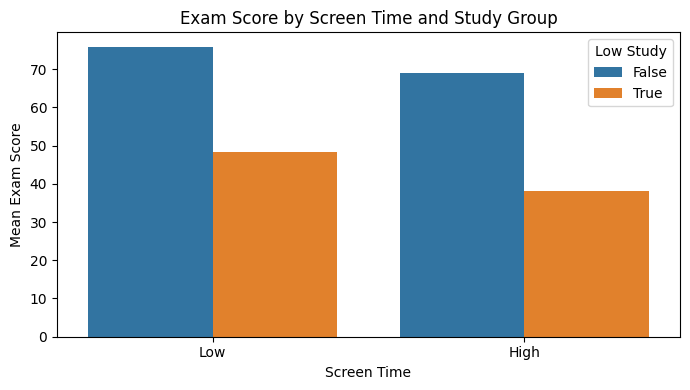

In [23]:
# Categorise students
df['low_study'] = df['study_hours_per_day'] < 1.5
df['high_screen'] = df['total_screen_time'] > 4

# Plot mean exam scores by group
plt.figure(figsize=(7, 4))
sns.barplot(data=df, x='high_screen', y='exam_score', hue='low_study', errorbar=None)
plt.title('Exam Score by Screen Time and Study Group')
plt.xlabel('Screen Time')
plt.ylabel('Mean Exam Score')
plt.xticks([0,1], ['Low', 'High'])
plt.legend(title='Low Study')
plt.tight_layout()
plt.show()

This barplot clearly shows that:
- Students who study more consistently score higher, regardless of screen time
- Among those who study less, high screen time is associated with significantly lower scores

This suggests that what students do in their spare time—particularly screen-related activities—may negatively affect their focus, wellbeing, or study quality, especially for students already studying very little.

### 5.2 Adding Mental Health into the Mix

To deepen the analysis, mental health ratings were also included:
- **Low Mental Health Group**: Students rating their mental health 3 or below (on a 1–10 scale)

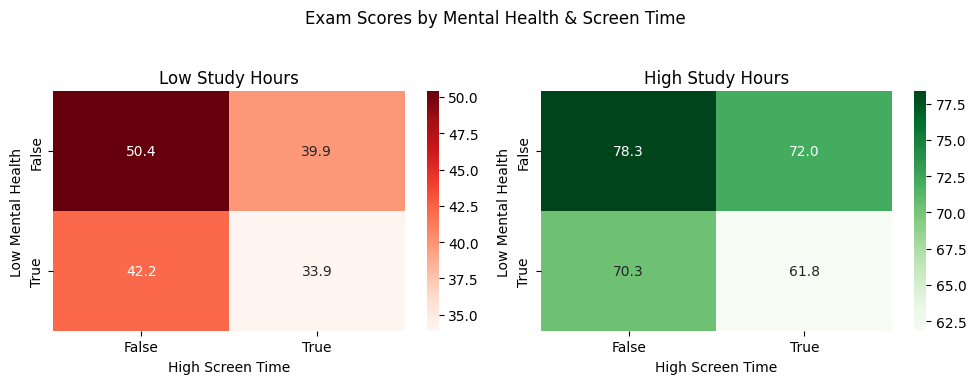

In [24]:
# Create low mental health group
df['low_mental_health'] = df['mental_health_rating'] <= 3

# Group by all three factors
summary = df.groupby(['low_study', 'high_screen', 'low_mental_health'])['exam_score'].mean().reset_index()

# Pivot tables for heatmaps
pivot_low_study = summary[summary['low_study']].pivot(index='low_mental_health', columns='high_screen', values='exam_score')
pivot_high_study = summary[~summary['low_study']].pivot(index='low_mental_health', columns='high_screen', values='exam_score')

# Visualise
fig, axes = plt.subplots(1, 2, figsize=(10,4))
sns.heatmap(pivot_low_study, annot=True, fmt=".1f", cmap='Reds', ax=axes[0])
axes[0].set_title('Low Study Hours')
axes[0].set_ylabel('Low Mental Health')
axes[0].set_xlabel('High Screen Time')

sns.heatmap(pivot_high_study, annot=True, fmt=".1f", cmap='Greens', ax=axes[1])
axes[1].set_title('High Study Hours')
axes[1].set_ylabel('Low Mental Health')
axes[1].set_xlabel('High Screen Time')

plt.suptitle('Exam Scores by Mental Health & Screen Time')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

These heatmaps reinforce the interaction effects between study habits, screen time, and mental health.

#### Conclusions
- **Study Hours Are Most Important**\
Students who study more score significantly higher, regardless of screen time or mental health.

- **High Screen Time Is Linked to Lower Scores**\
Especially for low-study students, high screen time corresponds with a significant performance drop.

- **Poor Mental Health Lowers Performance**\
Low mental health is associated with lower exam scores, particularly when combined with high screen time and low study time.

- **The Combination Matters Most**\
The lowest exam scores come from students with low study time, high screen use, and poor mental health, while the highest scores are from those with the opposite profile.


----

## 6. Lifestyle Factors and Mental Health 

Lifestyle habits such as sleep, exercise, and diet impact mental wellbeing. We explore pairs of these factors to understand their combined effects on mental health.

### 6.1 Sleep and Exercise

We split students based on:

- **Low sleep**: less than 5 hours per night

- **Low exercise**: fewer than 2 exercise sessions per week

- Outcome: proportion with low mental health (rating ≤ 4)

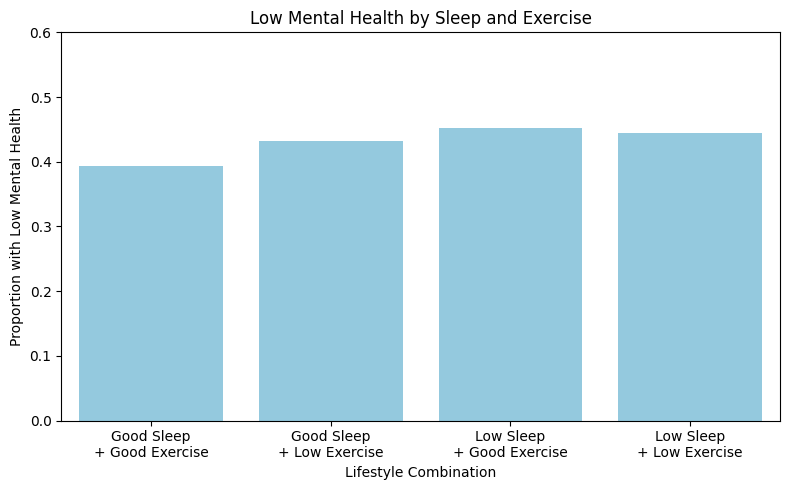

In [34]:
# Binary splits
df['low_sleep'] = df['sleep_hours'] < 5
df['low_exercise'] = df['exercise_frequency'] < 2
df['low_mental_health'] = df['mental_health_rating'] <= 4

# Aggregate by groups
summary = df.groupby(['low_sleep', 'low_exercise']).agg(
    proportion_low_mental_health=('low_mental_health', 'mean'),
    count=('low_mental_health', 'size')
).reset_index()

# Label groups for x-axis
conditions = [
    (summary['low_sleep']) & (summary['low_exercise']),
    (summary['low_sleep']) & (~summary['low_exercise']),
    (~summary['low_sleep']) & (summary['low_exercise']),
    (~summary['low_sleep']) & (~summary['low_exercise']),
]
choices = [
    'Low Sleep\n+ Low Exercise',
    'Low Sleep\n+ Good Exercise',
    'Good Sleep\n+ Low Exercise',
    'Good Sleep\n+ Good Exercise'
]
summary['group'] = np.select(conditions, choices, default='Other')

# Plot
plt.figure(figsize=(8,5))
sns.barplot(data=summary, x='group', y='proportion_low_mental_health', color='skyblue')
plt.ylabel('Proportion with Low Mental Health')
plt.ylim(0, 0.6)
plt.xlabel('Lifestyle Combination')
plt.title('Low Mental Health by Sleep and Exercise')
plt.tight_layout()
plt.show()

#### Interpretation
Students with both good sleep and exercise show the lowest rates of low mental health. Low sleep has a stronger impact than exercise.

### 6.2 Sleep and Diet

- **Diet quality**: Poor, Fair, Good (ordered categorical)

- Group by sleep and diet quality to examine their interaction

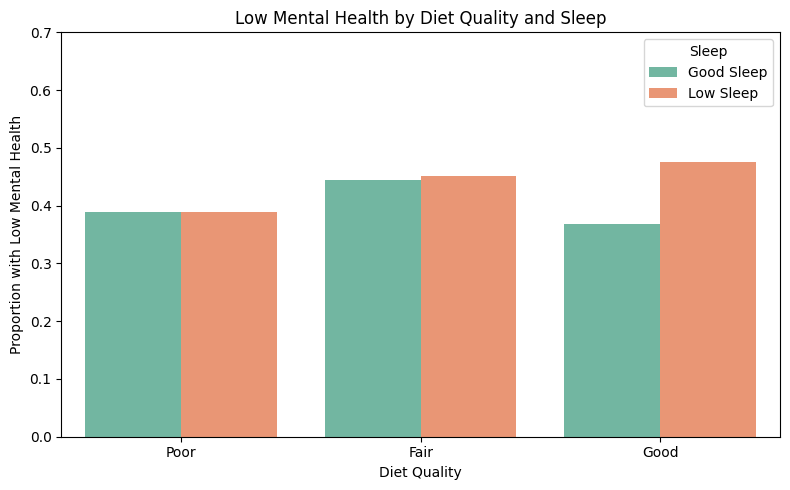

In [37]:
# Ensure diet_quality is categorical and ordered
df['diet_quality'] = pd.Categorical(df['diet_quality'], categories=['Poor', 'Fair', 'Good'], ordered=True)

# Group by sleep and diet_quality
diet_sleep = df.groupby(['low_sleep', 'diet_quality'], observed=False).agg(
    proportion_low_mental_health=('low_mental_health', 'mean'),
    count=('low_mental_health', 'size')
).reset_index()

# Labels for hue
diet_sleep['sleep_label'] = diet_sleep['low_sleep'].map({True: 'Low Sleep', False: 'Good Sleep'})

# Plot
plt.figure(figsize=(8,5))
sns.barplot(data=diet_sleep, x='diet_quality', y='proportion_low_mental_health', hue='sleep_label', palette='Set2')
plt.ylabel('Proportion with Low Mental Health')
plt.xlabel('Diet Quality')
plt.ylim(0, 0.7)
plt.title('Low Mental Health by Diet Quality and Sleep')
plt.legend(title='Sleep')
plt.tight_layout()
plt.show()

#### Interpretation
Sleep quality strongly influences mental health. Even a good diet cannot fully compensate for poor sleep, but with good sleep, better diet relates to better mental health.



### 6.3 Diet and Exercise

- Use **low exercise** as binary and diet as categorical
- Explore interaction of diet and exercise on low mental health

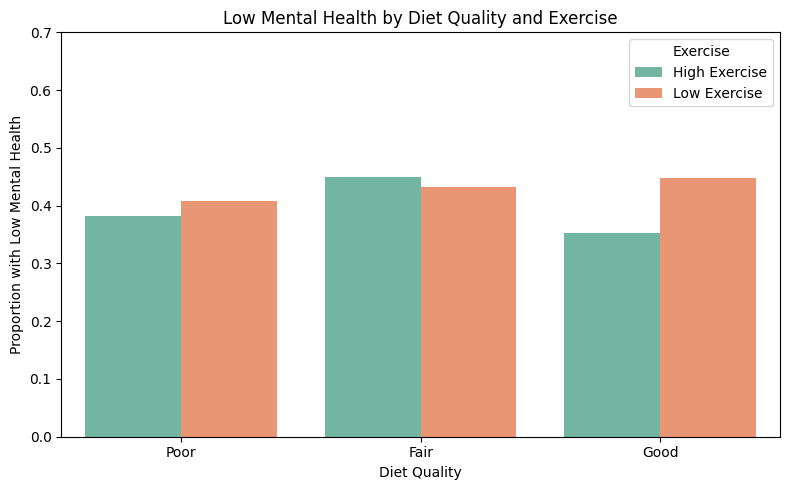

In [38]:
# Group by exercise and diet
diet_exercise = df.groupby(['low_exercise', 'diet_quality'], observed=False).agg(
    proportion_low_mental_health=('low_mental_health', 'mean'),
    count=('low_mental_health', 'size')
).reset_index()

# Labels for hue
diet_exercise['exercise_label'] = diet_exercise['low_exercise'].map({True: 'Low Exercise', False: 'High Exercise'})

# Plot
plt.figure(figsize=(8,5))
sns.barplot(data=diet_exercise, x='diet_quality', y='proportion_low_mental_health', hue='exercise_label', palette='Set2')
plt.ylabel('Proportion with Low Mental Health')
plt.xlabel('Diet Quality')
plt.ylim(0, 0.7)
plt.title('Low Mental Health by Diet Quality and Exercise')
plt.legend(title='Exercise')
plt.tight_layout()
plt.show()

#### Interpretation
Exercise improves mental health across all diet levels. However, diet quality plays a bigger role when exercise is adequate.

### 6.4 Summary 
- Sleep is the strongest predictor of low mental health in all pairs.
- Diet and exercise contribute meaningfully, especially when sleep quality is good.
- Improving even one lifestyle factor can positively impact mental wellbeing.
- Interventions targeting multiple habits simultaneously may yield the greatest benefits.

------

## Conclusions